## Contexto do desafio

O CFO da empresa fez uma reunião com todos os gerentes de loja e pediu para que cada um deles troxesse uma previsão diária das próximas 6 semanas de vendas.

Depois dessa reunião, todos os Gerentes entraram em contato com você, quequisitando uma previsão de vendas de sua loja.

### Entendendo o problema

Entender: A Motivação
- Qual o contexto?

Entender: A Causa Raiz do Problema
- Porque fazer uma Previsão de Vendas?

Entender: Quem é o Dono do Problema
- Quem será o Stakeholder? (Stakeholder é quem vai te guiar no problema)

Entender: O Formato da Socução
- Qual o formato da solução
- Granularidade
- Tipo do Problema
- Potencias Métodos
- Formato da Entrega



In [16]:
Kaggle = Rossmann Store Sales

SyntaxError: invalid syntax (460230113.py, line 1)

A Motivação: O CFO requisitou essa solução durante uma reunião de resultados mensais

A Causa Raiz do Problema: Investimento em Reforma das Lojas

Quem é o Stakeholder: O CFO

O Formato da Solução:
- Vendas diárias em R$ nas próximas 6 semanas
- Problema de Predição
- Time Series, Regressão e rede neural
- Predições acessadas via celular

## CRISP-DS

CRoss-Industry Process - Data Science

Método Cíclico de Desenvolvimento


1 Ciclo CRISP Completo:
- 1 versão End-to-End da solução;
- 2 Velocidade na Entrega de valor;
- 3 Mapeamento de todos os possíveis problemas.

In [17]:
O Ciclo CRISP-DS

Questão de Negócio --> Entendimento do negócio --> Coleta de Dados --> Limpeza dos Dados --> Exploração dos Dados -->
--> Modelagem dos Dados --> Algoritmos de Machine Learning --> Avaliação do Algoritmo --> -->| --> Modelo em Produção 

SyntaxError: invalid syntax (130760511.py, line 1)

In [19]:
Crisp - ds para o desafio da Rossmann

Questão de Negócio --> Entendimento do Negócio 

Qual é o valor das                     | Qual a motivação? A previsão de vendas foi requisitada pelo CFO em uma reunião
vendas de cada loja                    | mensal sobre os resultados das lojas.
nas próximas 6 semanas?                | Qual a causa Raiz do Problema?
                                    | Dificuladade em determinar o valor de investimento para reformas de cada loja.
                                | Quem é o dono do problema?
                                    Diretor Financeiro (CFO) da Rossmann
            | Qual o Formato da Solução.
            - Granularidade: Previsão de Vendas por Dia cada Loja para os próximos 42 dias, 6 semanas.
            - Tipo do Problema: Previsão de Vendas;
            - Potenciais Métodos: Séries Temporais
            - Formatoto de Entrega:
                1 - Valor total das vendas no final das 6 semanas
                2 - Como essas vendas acontecem diariamente
                
Update do Progresso do Projeto Rossmann

Questão de Negócio --> Entendimento do Negócio --> Coleta de Dados ==> LIMPEZA DOS DADOS <== Exploração dos dados -->
--> Modelagem dos dados --> algoritmos de Machine Learning--> Avaliação do Algoritmo --> Modelo em produção

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 9)

O Quão desafiador é o problema? 
Quantidade de Dados:
- Eu tenho os recursos corretos para trabalhar?
- Servidores? Custers? Spark? Hadoop?

Tipos de Variáveis:
- Quais os tipos de variáveis?
- % Numérica, %Categórica, %Temporal.

Quantidade de Dados Faltante:
-Qual o volume de dados NA?
-Qual a razão de faltar dados?
- Sistema? Input Manual?

Resumo Geral dos Dados:
- Estatística Descritiva


### Imports

In [20]:
! pip install inflection

In [2]:
import pandas as pd 
import inflection
import math
import seaborn as sns
import numpy as np
import datetime


from IPython.core.display import HTML
from matplotlib import pyplot as plt
from IPython.display import Image

### Helper Functions

In [22]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    
    plt.style.use( 'bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False)
    
    sns.set()
    

In [23]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Loading data

In [2]:
df_sales_raw = pd.read_csv( 'F:\\Repos_DS\\DS_em_Producao\\train.csv', low_memory=False)
df_sales_raw.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [3]:
df_store_raw = pd.read_csv( 'F:\Repos_DS\DS_em_Producao\\store.csv', low_memory=False)
df_store_raw.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [4]:
# merge

df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store')
df_raw.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [ ]:
# ou
df_raw.sample() # escolhe uma linha aleatória para mostrar

## Descrição de dados com Phyton

In [5]:
df1 = df_raw.copy()

In [6]:
df_raw.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
### Rename Columns

In [7]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore (x)
cols_new = list( map( snakecase, cols_old))

# rename
df1.columns = cols_new


In [8]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1014897,1033,4,2013-01-03,12732,1300,1,0,0,1,a,a,7680.0,3.0,2006.0,0,NaN,NaN,NaN


In [ ]:
## Colunas

* Store - id exclusivo para cada loja

* day_of_week - dia da semana

* date - data

* sales - o volume de negócios para um determinado dia (é o que você está prevendo)

* customers - o número de clientes em um determinado dia

* open - um indicador para saber se a loja estava aberta: 0 = fechado, 1 = aberto

* promo - indica se uma loja está executando uma promoção naquele dia

* state_holiday - indica um feriado estadual. Normalmente todas as lojas, com poucas exceções, estão fechadas nos feriados estaduais. Observe que todas as escolas estão fechadas nos feriados e fins de semana. a = feriado, b = feriado da páscoa, c = natal, 0 = nenhum

* school_holiday -  indica se a (Loja, Data) foi afetada pelo fechamento de escolas públicas

* store_type - diferencia entre 4 modelos de loja diferentes: a, b, c, d

* assortment - descreve um nível de estoque: a = básico, b = extra, c = estendido

* competition_distance - distancia em metros até a loja concorrente mais próxima

* competition_open_since_month - fornece o mes que o concorrente mais próximo foi aberto

* competition_open_since_year - fornece o ano que o concorrente mais próximo foi aberto

* promo2 - Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = a loja não está participando, 1 = a loja está participando
    
* promo2_since_week - descreve a semana do calendário em que a loja começou a participar do Promo2

* promo2_since_year - descreve o ano do calendário em que a loja começou a participar do Promo2

* promo_interval - descreve os intervalos consecutivos em que a Promo2 é iniciada, nomeando os meses em que a promoção é iniciada novamente. Por exemplo, "fevereiro, maio, agosto, novembro" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para essa loja

In [9]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## Data Dimensions

In [ ]:
print( 'Number of Rows: {}'. format( df1.shape[0]))
print( 'Number of Cols: {}'. format( df1.shape[1]))

## Data Types

In [ ]:
df1.dtypes


In [15]:
df1['date'] = pd.to_datetime( df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NA

In [12]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

In [13]:
df1['competition_distance'].max()

75860.0

In [16]:
### Fillout NA

# competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan(x) else x)               

#competition_open_since_month 

df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)


#competition_open_since_year 
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)

#promo2_since_week 

df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan( x['promo2_since_week']) else x['promo2_since_week'], axis = 1)


#promo2_since_year 
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan( x['promo2_since_year']) else x['promo2_since_year'], axis = 1)


#promo_interval   

month_map = { 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

df1['promo_interval'].fillna(0, inplace= True)

df1['month_map'] = df1['date'].dt.month.map( month_map)

df1['is_promo'] = df1[['promo_interval','month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis = 1)



In [17]:
df1.sample(5).T

,695864,205944,916704,398023,109902
store,890,785,960,984,633
day_of_week,3,3,1,6,5
date,2013-10-16 00:00:00,2015-01-28 00:00:00,2013-04-01 00:00:00,2014-07-12 00:00:00,2015-04-24 00:00:00
sales,3983,8189,0,6102,6899
customers,311,639,0,769,545
open,1,1,0,1,1
promo,0,1,0,0,0
state_holiday,0,0,b,0,0
school_holiday,0,0,1,0,0
store_type,a,d,d,c,d


In [18]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [ ]:
df1.isna().sum()

In [19]:
df1.to_csv('F:\\Repos_DS\\DS_em_Producao\\df1_rossmann_store.csv')

In [6]:
! pip install fsspec

In [2]:
df1 = pd.read_csv('F://Repos_DS//DS_em_Producao/df1_rossmann_store.csv', low_memory=False)

### Estatistica Descritiva

### Change Types

In [9]:
df1.dtypes # Depois de fazer alterações nas colunas conferir sempre o tipo delas novamente, pode ter mudado

Unnamed: 0                        int64
store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
month_map                        object
is_promo                          int64
dtype: object

In [10]:
# tem que alterar de float para int

df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

In [11]:
df1.dtypes

Unnamed: 0                        int64
store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month      int32
competition_open_since_year       int32
promo2                            int64
promo2_since_week                 int32
promo2_since_year                 int32
promo_interval                   object
month_map                        object
is_promo                          int64
dtype: object

### Descriptive Statistical

In [12]:
# dividir os atributos em numéricos e categórigos (objets)

num_attributes = df1.select_dtypes( include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude = ['int', 'float','datetime64[ns]'])

In [13]:
num_attributes.sample(2)

,Unnamed: 0,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,promo2,is_promo
70757,70757,513,5,17438,2025,1,0,0,400.0,0,0
515102,515102,758,4,3958,636,1,0,0,19780.0,0,0


In [14]:
cat_attributes.sample(2)

,date,state_holiday,store_type,assortment,promo_interval,month_map
383277,2014-07-27,0,a,c,0,Jul
397930,2014-07-12,0,a,a,0,Jul


### Numerical Attributes

In [15]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T # ct1 = central tendency 1
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply( np.std )).T # d1 = dispersion tendency 1
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T

# concatenate

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6 ]).T.reset_index() # m = metricas
m.columns = ['atributes','min','max','range','mean','median','std','skew','kurtosis']

In [16]:
m

,atributes,min,max,range,mean,median,std,skew,kurtosis
0,Unnamed: 0,0.0,1017208.0,1017208.0,508604.000000,508604.0,293642.944986,1.946584e-15,-1.200000
1,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-9.548800e-04,-1.200524
2,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,1.592823e-03,-1.246873
3,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,6.414596e-01,1.778375
4,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650e+00,7.091773
5,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045e+00,1.090723
6,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,4.878378e-01,-1.762018
7,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842e+00,0.815154
8,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,1.024234e+01,147.789712
9,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-2.255195e-03,-1.999999


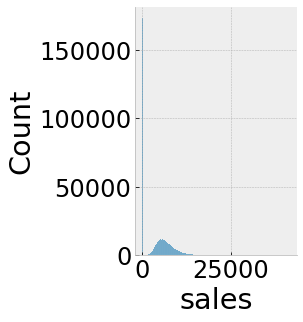

In [17]:
plt.style.use( 'bmh')
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams['font.size'] = 24
    
display( HTML( '<style>.container { width:100% !important;}</style>'))
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False)

sns.displot( df1['sales'])

### Categorical Attributes

In [ ]:
cat_attributes.apply(lambda x: x.unique().shape[0]) # apply aplica uma função em cada coluna, unique shape plota os valores unicos de todas as categorias

In [ ]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday' , y='sales' , data = aux1  ) # x = linha referencia, nome categoria, y = o que quero medir, data df1 porque tem o sales

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type' , y='sales' , data = aux1  )

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment' , y='sales' , data = aux1  )

### Feature Engineering

Precisamos ter as variáveis Disponíveis para Estudo durante a análise exploratória de dados. Se não o codigo fica muito bagunçado

### Update do Progresso do projeto Rossmann

In [ ]:
Questão de negócio --> Entendimento do negócio --> Coleta de Dados --> Limpeza dos dados ==> EXPLORAÇÃO DOS DADOS ==> Modelagem dos dados --> Algoritmos de Machine Limpezaearning --> Avaliação do algoritmo | --> Modelo em produção

### Mapa mental de Hipóteses

In [ ]:
* 1 - Fenômeno: 
    - Qual fenômeno estou modelando?
    
* 2 - Agentes:
    - Quem são os agentes que atuam sobre o fenômeno
    
* 3 - Atributos dos Agentes:
    - Quall a descrição dos Agentes?
    
Lista de Hipóteses:
    - Hipóteses para validar com os dados.

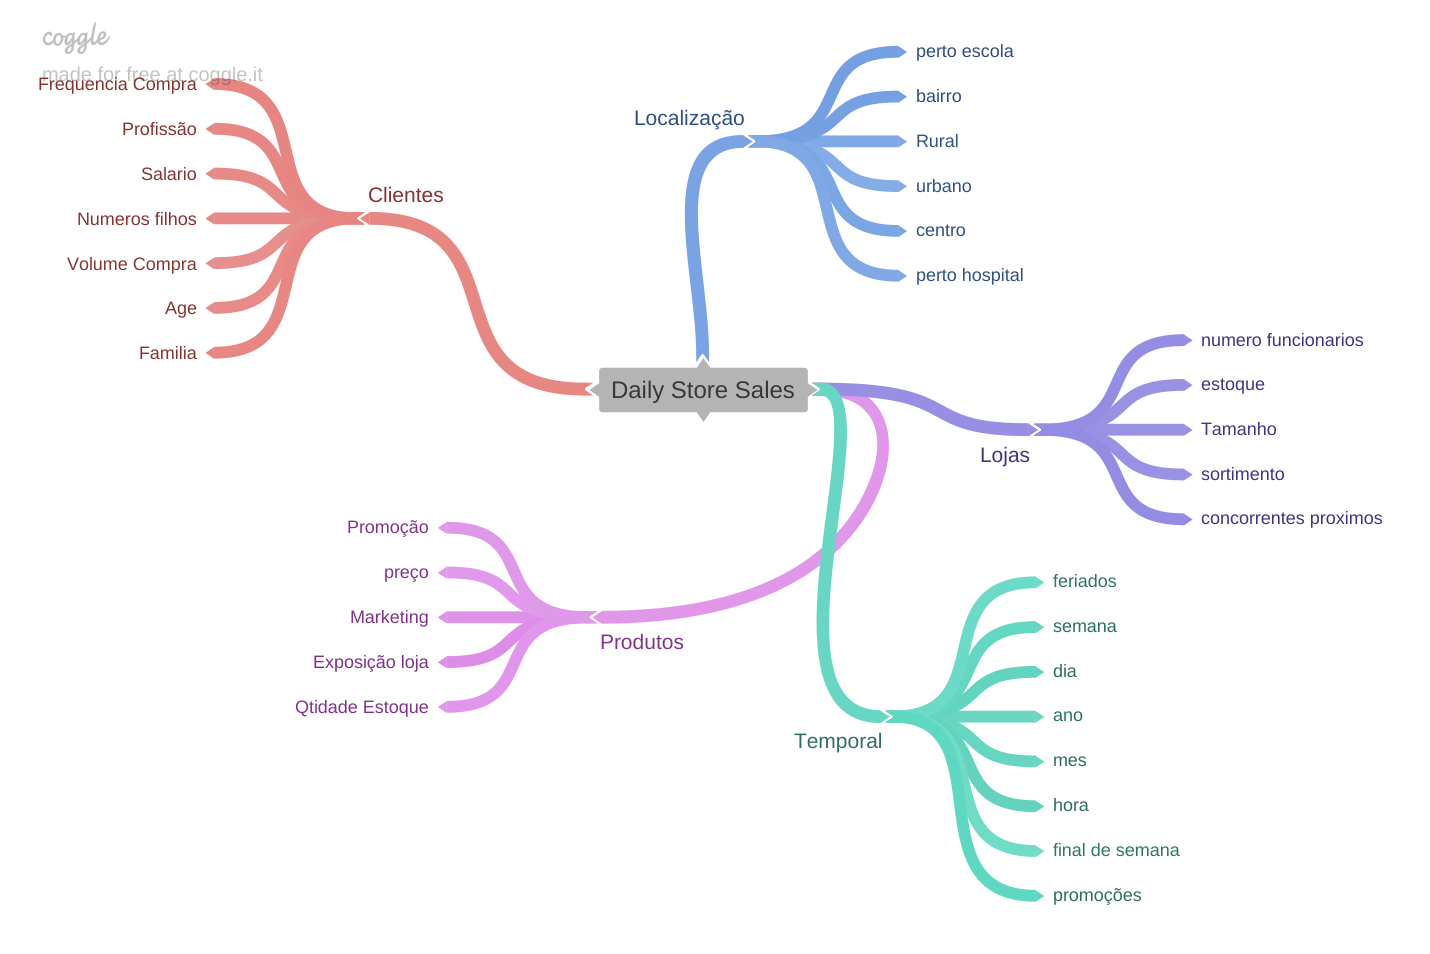

### Como Escrever as Hipóteses?


In [ ]:
Hipóteses são APOSTAS

- Lojas de Maior Porte deveriam vender Mais.

- Lojas com Maior sortimento deveriam vender Mais.

- Lojas com Mais competidores por perto deveriam vender menos.

### Criação da Hipóteses

#### Hipóteses relacionadas a Loja

**1.** Lojas com maior quadro de funcionários deveriam vender mais.

**2.** Lojas com maior estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais.

**4.** Lojas com menor porte deveriam vender menos.

**5.** Lojass com maior sortimento deveriam vender mais.

#### Hipóteses relacionadas ao Produto

**1.** Lojas que investem mais em marketing deveriam vender mais.

**2.** Lojas que expõe mais os produtos na vitrine deveriam vender mais.

**3.** Lojas que tem preços menores nos produtos deveriam vender mais.

**4.** Lojas que tem preços menores nos produtos por mais tempo deveriam vender mais.



#### Hipóteses relacionadas a Tempo

**1.** Lojas que tem mais feriados deveriam vender menos.

**2.** Lojas que abrem nos primeiros seis meses deveriam vender mais.

**3.** Lojas que abrem nos finais de semana deveriam vender mais.



## Lista Final das Hipóteses

In [ ]:
# 1 - Lojas com maior sortimento deveriam vender mais.

In [3]:
df1

,Unnamed: 0,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,...,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,0,1,5,2015-07-31,5263,555,1,1,0,1,...,a,1270.0,9.0,2008.0,0,31.0,2015.0,0,Jul,0
1,1,2,5,2015-07-31,6064,625,1,1,0,1,...,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",Jul,1
2,2,3,5,2015-07-31,8314,821,1,1,0,1,...,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",Jul,1
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,...,c,620.0,9.0,2009.0,0,31.0,2015.0,0,Jul,0
4,4,5,5,2015-07-31,4822,559,1,1,0,1,...,a,29910.0,4.0,2015.0,0,31.0,2015.0,0,Jul,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1017204,1111,2,2013-01-01,0,0,0,0,a,1,...,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",Jan,1
1017205,1017205,1112,2,2013-01-01,0,0,0,0,a,1,...,c,1880.0,4.0,2006.0,0,1.0,2013.0,0,Jan,0
1017206,1017206,1113,2,2013-01-01,0,0,0,0,a,1,...,c,9260.0,1.0,2013.0,0,1.0,2013.0,0,Jan,0
1017207,1017207,1114,2,2013-01-01,0,0,0,0,a,1,...,c,870.0,1.0,2013.0,0,1.0,2013.0,0,Jan,0


In [ ]:
# 2 - Lojas com competidores mais próximos deveriam vender menos

In [ ]:
# 3 - Lojas com competidores a mais tempo deveriam vender mais.

In [ ]:
# 4 - Lojas com promoções ativas por mais tempo deveriam vender mais.

In [ ]:
# 5 - Lojas com mais dias de promoção deveriam vender mais.

In [ ]:
# 6 - Lojas com mais promoções deveriam vender mais.

In [ ]:
# 7 - Lojas abertas durante o feriado de Natal deveriam vender mais.

In [ ]:
# 8 - Lojas deveriam vender mais ao longo dos anos.

In [ ]:
# 9 - Lojas deveriam vender mais no segundo semestre do ano.

In [ ]:
# 10 - Lojas deveriam vender mais depois do dia 10 de cada mês.

In [ ]:
# 11 - Lojas deveriam vender menos aos finais de semana.

In [ ]:
# 12 -Lojas deveriam vender menos durante os feriados escolares.

In [4]:
df2 = df1.copy()

In [10]:
df2['date'] = pd.to_datetime( df2['date'])

In [11]:
df2.dtypes

Unnamed: 0                               int64
store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
data         

In [20]:
df2['competition_distance']         = df2['competition_distance'].astype(int)       
df2['competition_open_since_month'] = df2['competition_open_since_month'].astype(int)       
df2['competition_open_since_year']  = df2['competition_open_since_year'].astype(int)       
df2['promo2_since_week']            = df2['promo2_since_week'].astype(int)       
df2['promo2_since_year']            = df2['promo2_since_year'].astype(int)       

### Feature Engineering

In [12]:
# year
df2 ['year'] = df2 ['date'].dt.year
# month
df2 ['month'] = df2 ['date'].dt.month
# week od year
df2 ['week_of_year'] = df2 ['date'].dt.weekofyear
# year week
df2 ['year_week'] = df2 ['date'].dt.strftime( '%Y-%W')



C:\Users\User\AppData\Local\Temp\ipykernel_2156\479332591.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2 ['week_of_year'] = df2 ['date'].dt.weekofyear


In [13]:
df2.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,1,1,1,1


In [21]:
# competition since
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1 ), axis=1 )
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'])/30).apply( lambda x:x.days ).astype(int)
# promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype( str )
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime (x + '-1', '%Y-%W-%w')- datetime.timedelta( days = 7))
df2['promo_time_week'] = (( df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)


In [23]:
# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')

# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day')

In [24]:
df2.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1


In [27]:
df2.to_csv('F:\\Repos_DS\\DS_em_Producao\\df2_rossmann_store.csv', index = False)

In [3]:
df2 = pd.read_csv('F://Repos_DS//DS_em_Producao/df2_rossmann_store.csv', low_memory=False)

In [7]:
df2.head(2)


,Unnamed: 0,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,...,is_promo,data,year,month,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,0,1,5,2015-07-31,5263,555,1,1,regular_day,1,...,0,2015-07-31,2015,7,31,2015-30,2008-09-01,84,2015-07-27,0
1,1,2,5,2015-07-31,6064,625,1,1,regular_day,1,...,1,2015-07-31,2015,7,31,2015-30,2007-11-01,94,2010-03-22,279


In [10]:
df3.columns

Index(['Unnamed: 0', 'store', 'day_of_week', 'date', 'sales', 'customers',
       'open', 'promo', 'state_holiday', 'school_holiday', 'store_type',
       'assortment', 'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'data',
       'year', 'month', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

### Filtragem das variáveis

In [6]:
df3 = df2.copy()

### Filtragem das linhas

In [8]:
df3 = df3[(df3['open'] !=0) & (df3['sales']  > 0)]

### Seleção das Colunas

In [12]:
cols_drop = ['Unnamed: 0','customers', 'open','promo_interval', 'month_map','data']
df3 = df3.drop(cols_drop, axis = 1)

In [13]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

In [14]:
df3.to_csv('F:\\Repos_DS\\DS_em_Producao\\df3_rossmann_store.csv', index = False) 